In [5]:
# load packages
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [6]:
# load data
data = pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


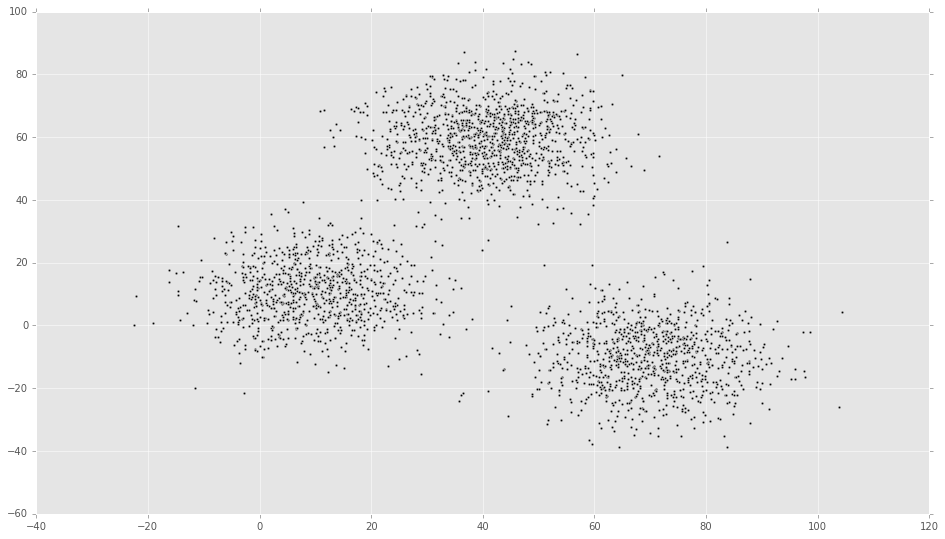

In [7]:
v1 = data['V1'].values
v2 = data['V2'].values
X = np.array(list(zip(v1,v2)))
plt.scatter(v1,v2,c='black',s=7)

In [8]:
# distance calculator
def dist(a, b, ax=1):
    return np.linalg.norm(a-b, axis=ax)

In [10]:
# initialize cluster centroids
k = 3
C_x = np.random.randint(0,np.max(X)-20,size=k)
C_y = np.random.randint(0,np.max(X)-20,size=k)
C = np.array(list(zip(C_x,C_y)),dtype=np.float32)
print('Initial Centroids:')
print(C)

Initial Centroids:
[[50.  5.]
 [28. 48.]
 [65. 18.]]


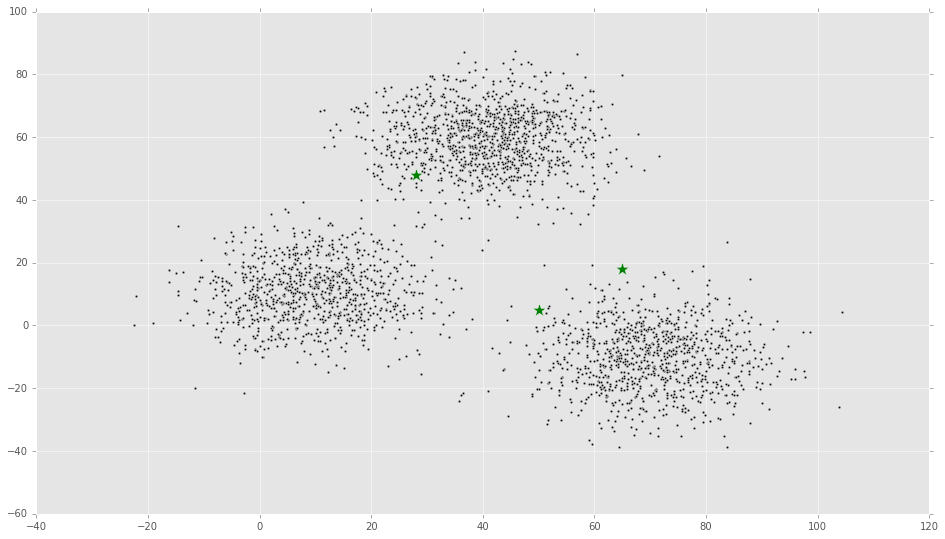

In [11]:
# plot along the centroids
plt.scatter(v1,v2,c='#050505',s=7)
plt.scatter(C_x,C_y,c='g',s=200,marker='*')

In [12]:
# initialize old centroids
C_old = np.zeros(C.shape)
# initialize labels
clusters = np.zeros(len(X))
# initialize error function - distance between old and new centroids
error = dist(C, C_old, None)

In [13]:
# classification loop
while error != 0:
    # assign values to the cloest centroids
    for i in range(len(X)):
        distance = dist(X[i], C)
        cluster = np.argmin(distance)
        clusters[i] = cluster
    # store the old centroids
    C_old = deepcopy(C)
    
    # find the new centroids
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    
    # calculate error
    error = dist(C, C_old, None)
    

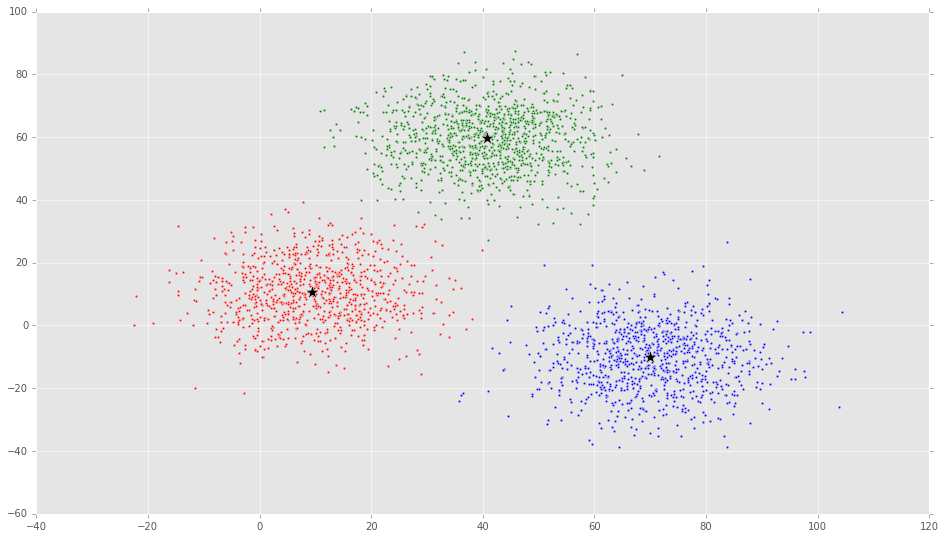

In [16]:
# test classifier
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [18]:
# compare to sk-learn
from sklearn.cluster import KMeans
# number of clusters
kmeans = KMeans(n_clusters=3)
# fit the data
kmeans = kmeans.fit(X)
# get the cluster labels
labels = kmeans.predict(X)
# centroid values
centers = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values")
print("Scratch")
print(C) # From Scratch
print("sklearn")
print(centers) # From sci-kit learn

Centroid values
Scratch
[[  9.478045  10.686052]
 [ 40.683628  59.715893]
 [ 69.92419  -10.119641]]
sklearn
[[  9.4780459   10.686052  ]
 [ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]]
